## Birth Rate Analysis

Let’s take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
births = pd.read_csv("births.csv")
print(births.head())
# births['day'].fillna(0, inplace=True)
# births['day'] = births['day'].astype(int)
births['day'] = births['day'].fillna(0)
births['day'] = births['day'].astype(int)


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [5]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year :

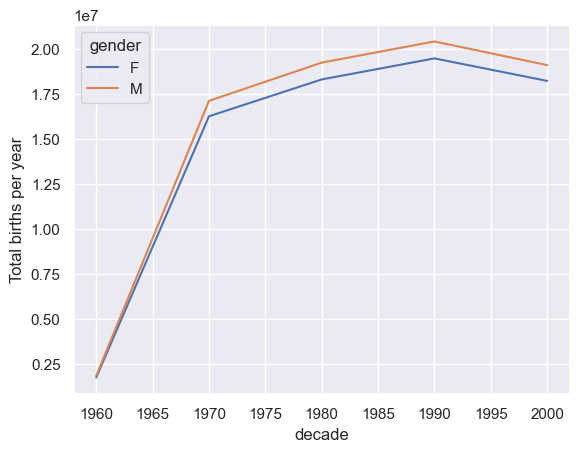

In [6]:


# Load the births data from the CSV file
births = pd.read_csv("births.csv")

# Calculate the decade based on the 'year' column
births['decade'] = (births['year'] // 10) * 10

# Create a pivot table of total births per decade and gender
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

# Plot the data
birth_decade.plot()
plt.ylabel("Total births per year")
plt.show()


In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
# birth_decade.plot()
# plt.ylabel("Total births per year")
# plt.show()

Further data exploration:
There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [9]:
import numpy as np

quartiles = np.percentile(births['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:



In [10]:
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')
births['day of week'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

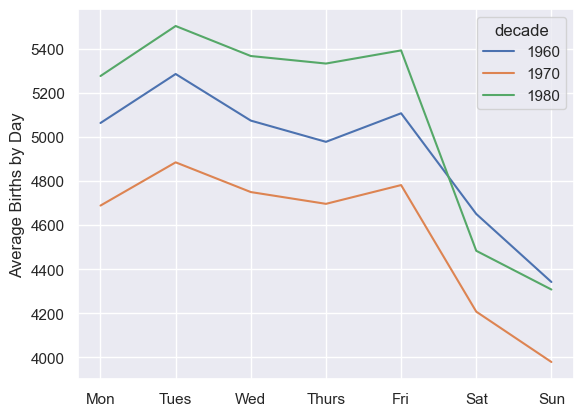

In [11]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately:

In [13]:
# Create a pivot table of births aggregated by month and day of the month
births_month = births.pivot_table('births', [births.index.month, births.index.day])

# Print the first few rows of the pivot table
print(births_month.head())

# Create a new datetime index using the month and day information
births_month.index = [pd.Timestamp(2012, month, day) for (month, day) in births_month.index]

# Print the first few rows of the pivot table with datetime index
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


In [14]:
# births_month = births.pivot_table('births', [births.index.month, births.index.day])
# print(births_month.head())

# births_month.index = [pd.datetime(2012, month, day)
#                       for (month, day) in births_month.index]
# print(births_month.head())

Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

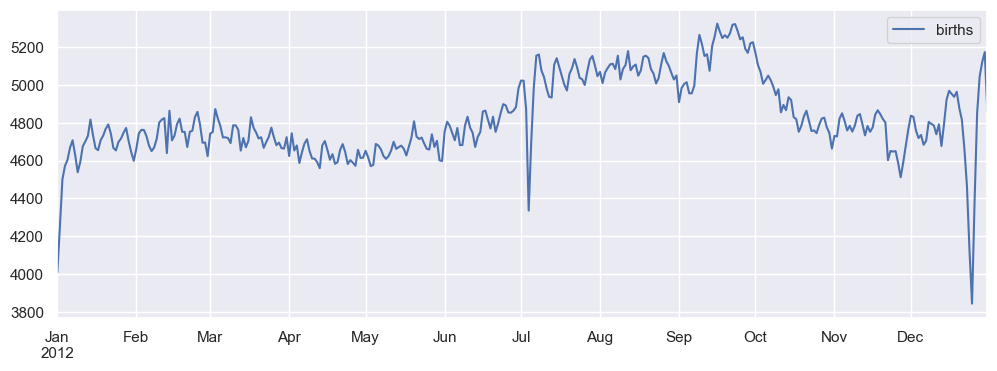

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()